# Statistical Forecasting Approach – Basic Models

COURSE TITLE	:	Time Series Analysis and Stochastic Methods <br>
COURSE CODE	:	DS 412<br>

Prepared by: **Matthew R. Maulion, MSc**


**Imports and Libraries**

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Time Series Concepts

Before we dig dig deep in to the basic models that are used for forecasting time series data, let us go through some very important time series concepts that are necessary to be understood in time series forecasting. 

* Autocorrelation
* ACF Plots
* White Noise
* Stationarity
* Differencing


### Autocorrelation

Autocorrelation is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals. It's conceptually similar to the correlation between two different time series, but autocorrelation uses the same time series twice: once in its original form and once lagged one or more time periods.

 > lagged - **showing a delayed effect.**

For example, if it's rainy today, the data suggests that it's more likely to rain tomorrow than if it's clear today. When it comes to investing, a stock might have a strong positive autocorrelation of returns, suggesting that if it's "up" today, it's more likely to be up tomorrow, too.

* **Autocorrelation** represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.
* **Autocorrelation** measures the relationship between a variable's current value and its past values.
* An **autocorrelation** of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.


**Understanding Autocorrelation**

Autocorrelation can also be referred to as lagged correlation or serial correlation, as it measures the relationship between a variable's current value and its past values.

As a very simple example, take a look at the five percentage values in the chart below. We are comparing them to the column on the right, which contains the same set of values, just moved up one row.

<img src='stock_data.png' width=700 height=700>

*__Plottiing the Table Above__*

In [2]:
data_1 = [10, 5, -2, -8, -5]
data_2 = [5, -2, -8, -5, np.nan]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

df = pd.DataFrame(data_1, index=days)
df.rename(columns={0: 'Current'}, inplace=True)
df['Next_day'] = data_2

df

,Current,Next_day
Monday,10,5.0
Tuesday,5,-2.0
Wednesday,-2,-8.0
Thursday,-8,-5.0
Friday,-5,NaN


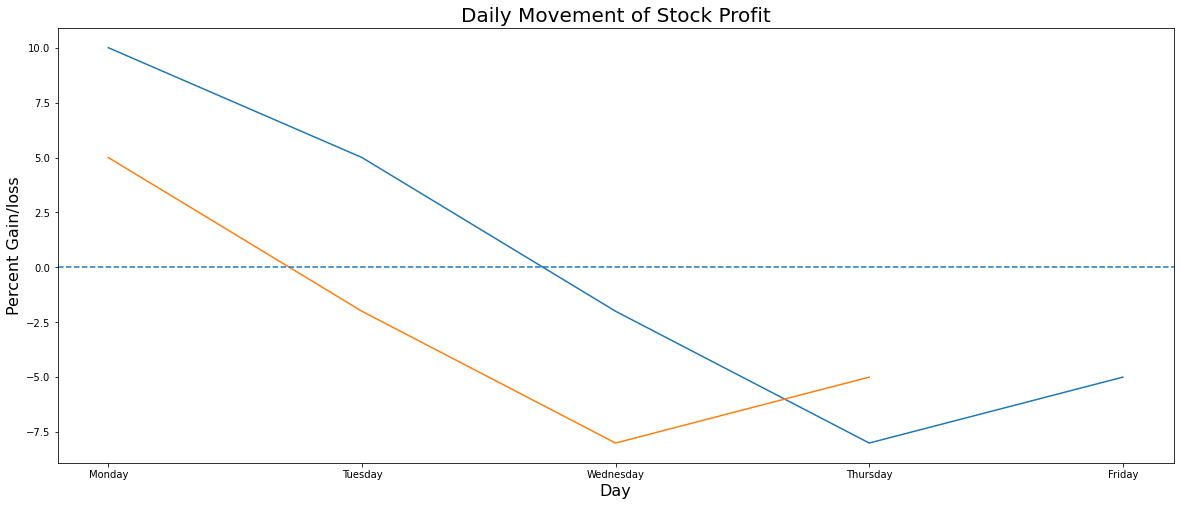

In [3]:
fig, ax = plt.subplots(figsize=(20,8))

plt.plot(df['Current']) #blue plot
plt.plot(df['Next_day']) #orange plot

plt.axhline(0, ls='--')

plt.title('Daily Movement of Stock Profit', size = 20)
plt.ylabel('Percent Gain/loss', size=16)
plt.xlabel('Day', size=16)
plt.show()

When calculating autocorrelation, the result can range from -1 to +1.

An **autocorrelation of +1** represents a perfect positive correlation (an increase seen in one time series leads to a proportionate increase in the other time series).

<img src='auto_corr_+.png' width=700 height=700>

On the other hand, an autocorrelation of -1 represents a perfect negative correlation (an increase seen in one time series results in a proportionate decrease in the other time series).

<img src='auto_corr_-.png' width=700 height=700>

Autocorrelation measures linear relationships. Even if the autocorrelation is minuscule, there can still be a nonlinear relationship between a time series and a lagged version of itself.

**Testing for Autocorrelation**

The most common method of test autocorrelation is the **Durbin-Watson** test. Without getting too technical, the Durbin-Watson is a statistic that detects autocorrelation from a regression analysis.

The Durbin-Watson always produces a test number range from 0 to 4. Values closer to 0 indicate a greater degree of positive correlation, values closer to 4 indicate a greater degree of negative autocorrelation, while values closer to the middle suggest less autocorrelation.

**So why is autocorrelation important in financial markets?**

Simple. Autocorrelation can be applied to thoroughly analyze historical price movements, which investors can then use to predict future price movements. Specifically, autocorrelation can be used to determine if a momentum trading strategy makes sense. 

**Autocorrelation in ACF Plots and in the context of Time Series Analysis**

According to data scientist, Marco Peixeiro, in a simpler sense, we have multiple autocorrelation coefficients, each corresponding to a different lag. For example, $r_1$ for the correlation between $y_t$ and $y_{t-1}$, $r_2$ for the correlation between $y_{t-1}$ and $y_{t-2}$, and so on.   

We usually plot the **Autocorrelation Function (ACF)** to examine autocorrelation between our time series. It is a scatter plot with the lag on the x-axis and the coefficients on the y-axis. To further analyze the plot, we also have the interval of significance (**blue region**) which helps us to determine whether the coefficient that we have is significant or not. The ACF is presented in the correlogram below:

<img src='acf.png' width=700 height=700>

Graph notes:

-	When there is a trend, the autocorrelation is high for small lags, and it gradually decreases as the lag increases.
- Therefore, the plot shows a time series with an evident trend
-	Autocorrelation is always 1 at lag 0


### White Noise

If the time series has no autocorrelation, then it is just called **white noise**. 

White noise in time series analysis indicates a purely stochastic process we expect 95% of the spikes in the ACF to lie within the interval of significance (blue region). If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.


<img src='acf_whitenoise.png' width=700 height=700>

As we can see, the time series is indeed random and purely white noise. Take note that in white noise the only significant coefficient is at lag  0 because by nature it is always 1.  

**White noise** is an important concept in time series analysis and forecasting.

It is important for two main reasons:

- Predictability: If your time series is white noise, then, by definition, it is **random**. You cannot reasonably model it and make predictions.
- Model Diagnostics: The **series of errors from a time series forecast model should ideally be white noise**.

Model Diagnostics is an important area of time series forecasting.

Time series data are expected to contain some white noise component on top of the signal generated by the underlying process.

For instance, once predictions have been made by a time series forecast model, they can be collected and analyzed. The **series of forecast errors should ideally be white noise**.

When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predictions. All that is left is the random fluctuations that cannot be modeled.

*__PS:__ A sign that forecast errors of model predictions are not white noise is an indication that further improvements to the forecast model may be possible.*

### Stationarity

A **stationary time** series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

For instance, consider the following plots below:

<img src='tsplots.png' width=1000 height=1000>

BREAKOUT: **Which of these series are stationary?** 
- (a) Google stock price for 200 consecutive days; 
- (b) Daily change in the Google stock price for 200 consecutive days; 
- (c) Annual number of strikes in the US; 
- (d) Monthly sales of new one-family houses sold in the US; 
- (e) Annual price of a dozen eggs in the US (constant dollars); 
- (f) Monthly total of pigs slaughtered in Victoria, Australia; 
- (g) Annual total of lynx trapped in the McKenzie River district of north-west Canada;
- (h) Monthly Australian beer production; (i) Monthly Australian electricity production.


> **Insert answeer here**

Let us look at these correlograms once again:

<img src='acf_whitenoise.png' width=700 height=700>
<img src='acf.png' width=700 height=700>


**Question**: Tell me which one is stationary and non-stationary and why?

> **Insert answer here**

### Differencing

Differencing in time series analysis is called a transformation technique. Take a look at the previous image with the Google stock price being non-stationary in panel (a), but the daily changes were stationary in panel (b). This shows one way to make a non-stationary time series stationary — compute the differences between consecutive observations. This method is known as differencing. 

Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

As well as looking at the time plot of the data, the ACF plot is also useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly. Also, for non-stationary data, the value of r1 is often large and positive. See the difference between the undifferenced (left) and differenced (right) acf plots below: 

<img src='diff.png' height=1000 width=1000>


The ACF of the differenced Google stock price looks just like that of a white noise series. There are no autocorrelations lying outside the 95% limits. This suggests that the daily change in the Google stock price is essentially a random amount which is uncorrelated with that of previous days.

**How many times should we difference a time series?**

It is possible to difference a time series more than once if necessary until we make it stationary, but we rarely difference a time series more than twice. 


## Random Walk Model

In a random walk model, the location at time $t$ is the sum of the previous location and some random noise. Given that, we assume noise is normally distributed (mean of 0 and variance of 1). 

Mathematically, the random walk model is represented by:

<img src='randomwalk.png' width=500 length=500>

where $X_t$ is the value at location $t$ which is just the sum of the previous observation $X_{t-1}$ and some random noise $Z_t$. <br><br>

And the sum of the noise (starting at 1 until any point in time) is represented as:

<img src='sumnoise.png' width=500 length=500>

Let us simulate this model in code.

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [16]:
plt.rcParams['figure.figsize'] = [10, 7.5]

### Simulation of Random Walk Model

In [17]:
#generate a thousand random data points (random errors based on the previous step)
steps = np.random.standard_normal(1000)

#sum starts 0 at position 0
steps[0]=0

#random walk is the cumulative sum of all the steps (points)
random_walk = np.cumsum(steps)

In [18]:
#display the first 10 observations in our random_walk values

random_walk[:10] #this varies everytime since this is random

array([ 0.        ,  2.18325254,  2.5895527 ,  1.70003054,  0.47129614,
        0.44710538, -0.18305447, -1.12102796, -1.92493076, -1.32692046])

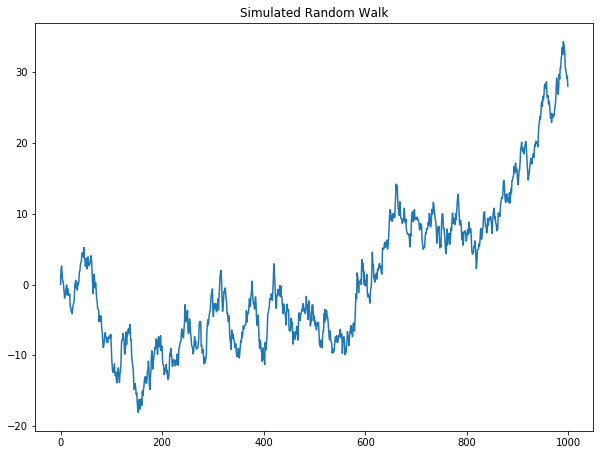

In [19]:
#plot the random_walk values
plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

### Extracting the ACF plot (correlogram)

In [20]:
#using the acf function earlier in the declarations, you can generate your ACF plopt
random_walk_acf_coef = acf(random_walk)

#display
random_walk_acf_coef

array([1.        , 0.99206173, 0.98378377, 0.97547297, 0.96754662,
       0.96009092, 0.95238707, 0.94424515, 0.93568114, 0.92649726,
       0.91708816, 0.90788006, 0.89864058, 0.8896548 , 0.88108942,
       0.87299735, 0.86523727, 0.85828576, 0.85144305, 0.84503645,
       0.83871495, 0.83176804, 0.82520452, 0.81891076, 0.81356478,
       0.80880085, 0.80436771, 0.79976019, 0.79505468, 0.79065618,
       0.78644494, 0.78205903, 0.77790759, 0.7743777 , 0.77073442,
       0.76720249, 0.76328636, 0.75949576, 0.75553684, 0.75187648,
       0.74840148])

What do you notice with the values? Recall our discussion earlier. 

- lag 0 starts at 1
- coefficients decrease steadily from 1

To have a better understanding on the ACF values, we can plot these in a **correlogram**. 

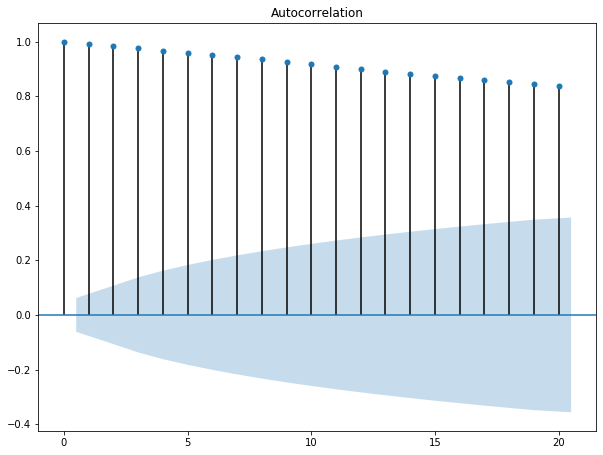

In [21]:
#use the function plot_acf - set lags to 20)
plot_acf(random_walk, lags=20);

What can you say with the correlogram?

> **Insert answer here**

How can we make it non-stationary?

> **Insert answer here**

What will that get us? 

> **Insert answer here**

### Differencing

In [22]:
#take the difference between 1 time stamp intervals 
#use numpy
random_walk_diff = np.diff(random_walk, n=1)

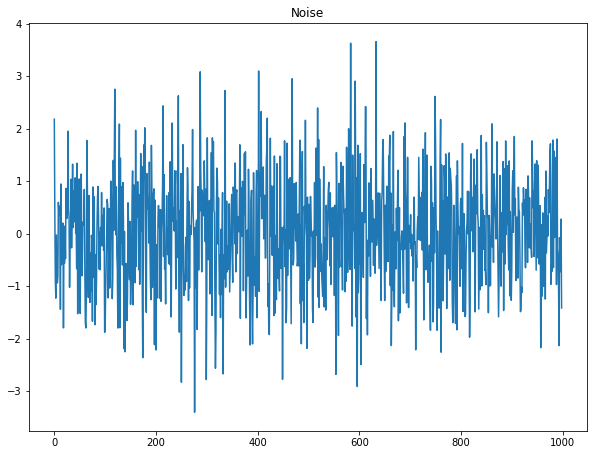

In [23]:
# plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk_diff)
plt.title('Noise')
plt.show()

What can you say with the graph?

> **Insert answer here**

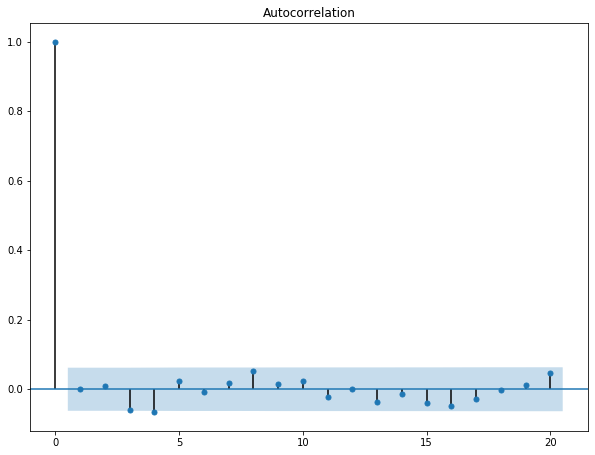

In [24]:
plot_acf(random_walk_diff, lags=20);

What can you say with the correlogram?

> **Insert answeer here**

**Next topic:**

## Moving Average Model (MA) 

In time series analysis, the moving-average model (MA model), also known as moving-average process, is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

Together with the autoregressive (AR) model, the moving-average model is a special case and key component of the more general ARMA and ARIMA models of time series, which have a more complicated stochastic structure.

Uses and characteristics:
- The MA model is used for forecasting time series data
- It uses the past forecast errors to predict the next point in time
- We refer to the moving average model as the MA(**q**) model where our q is the **order** 

Mathematically, the moving average model is represented by:

<img src='MA_model.png' width=500 length=500>

where $Z_t$ is ome witenoise and $\theta_t$ is some weight. <br><br>

A Moving Average Model of order 2 is represented as:

<img src='MA_model2.png' width=500 length=500>

Let us simulate the moving average model in code. 

In [25]:
from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [26]:
plt.rcParams['figure.figsize'] = (10, 7.5)

### Simulation of a Moving Average Model - MA model of order 2  MA(2)

This is the equation that we will be simulating:

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

This is a process of order 2. 

In [27]:
#Define ma2 array and ar2 array
#ma2 will contain coefficients of the lags of the MA2 process
#going to be a numpy array
#note that coefficient of lag 0 is always almost equal to 1

#what values will we place here?
ma2 = np.array()

#for the purpose of simulation we shall also place the coefficients of the AR process
#to declare that there is no AR process, simply place 0 as coefficent for both time stamps t-1 and t-2

#what values will we place here?
ar2 = np.array() 

#print the arrays
print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [29]:
#create a MA2 process wiith 1000 samples
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

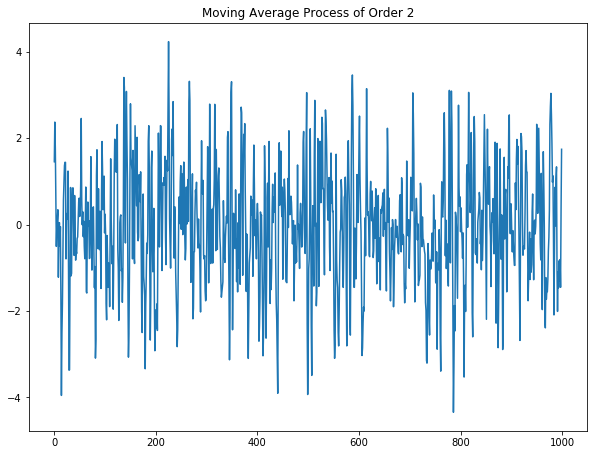

In [30]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

**Zoom in to the plot**

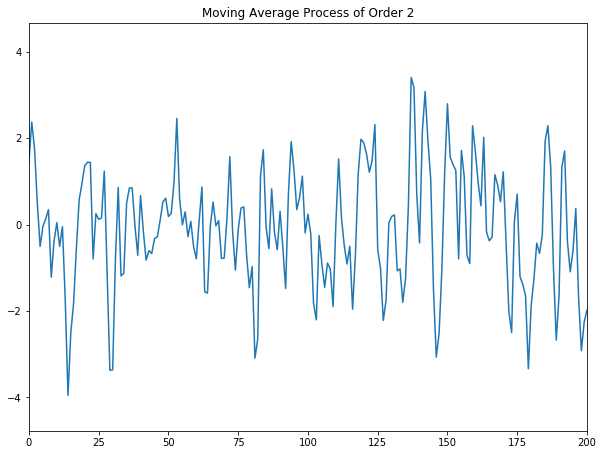

In [31]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

### Plot the ACF plot

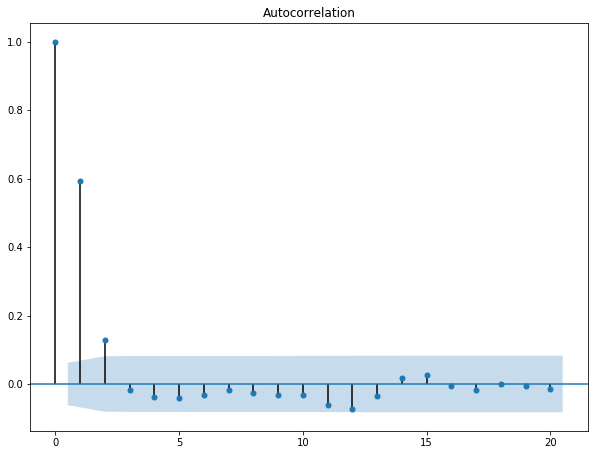

In [32]:
plot_acf(MA2_process, lags=20);

### Model Simulation to get back our coefficients

In [33]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

#order parameter
#AR process
#order of differencing
#order of MA process
print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1426.514
Date:                Wed, 29 Sep 2021   AIC                           2861.029
Time:                        14:02:36   BIC                           2880.648
Sample:                             0   HQIC                          2868.487
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0451      0.067     -0.673      0.501      -0.177       0.086
ma.L1          0.8675      0.030     29.164      0.000       0.809       0.926
ma.L2          0.2243      0.029      7.612      0.0

### Make Predictions using MA model

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from random import random

# contrived dataset - (made up dataset)
data = [x + random() for x in range(1, 100)]

# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()

# make prediction ()
yhat = model_fit.predict(len(data),len(data))
print(yhat)

[75.57679153]


## Auto Regressive Model (AR) 

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model. The method is suitable for univariate time series without trend and seasonal components. Contrary to the moving-average (MA) model, the autoregressive model is not stationary hence it can only be applied to stationary time series. 

Uses and characteristics:
- The auto regressive model uses a **linear combination** of past values of the target to make a prediction 
- Autoregression means regression against the target itself
- We refer to the autoregressiive model as the AR(**p**) model where our p is the **order** 
- Autoregressive models are remarkably flexible at handling a wide range of different time series patterns. 

Mathematically, the autoregressive model is represented by:

<img src='AR_model.png' width=500 length=500>

where $p$ is the order, $c$ is the constant and $\epsilon$ is noise at time $t$

Let us see how this will be implemented in code.

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [57]:
plt.rcParams['figure.figsize'] = (10, 7.5)

### Simulation of a Auto Regressive Model - AR model of order 2  AR(2)

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [59]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

#Define ma2 array and ar2 array
#ar2 will contain coefficients of the lags of the AR2 process
#going to be a numpy array
#note that coefficient of lag 0 is always almost equal to 1

ar2 = np.array([1, 0.33, 0.5])

#for the purpose of simulation we shall also place the coefficients of the MA process
#to declare that there is no MA process, simply place 0 as coefficent for both time stamps t-1 and t-2
ma2 = np.array([1, 0, 0]) 

#print the arrays
print(ar2)
print(ma2)

[1.   0.33 0.5 ]
[1 0 0]


In [61]:
#create a AR2 process wiith 1000 samples
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

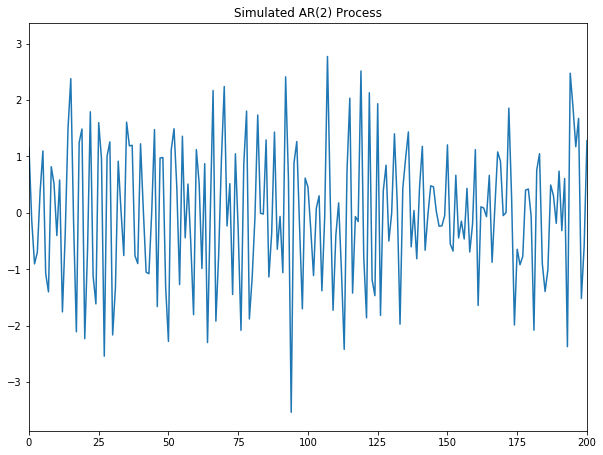

In [62]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

### Plot the AR ACF plot 

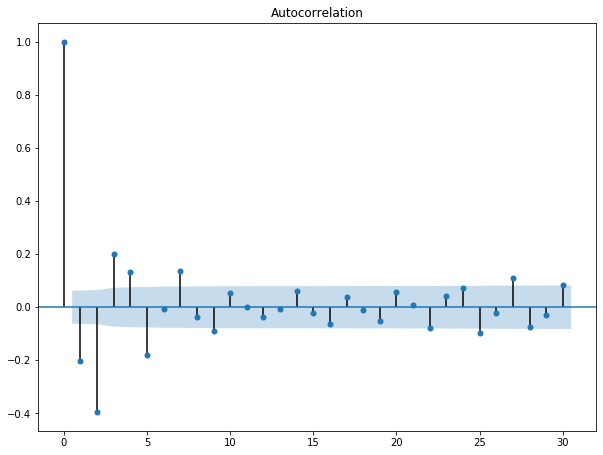

In [63]:
plot_acf(AR2_process);

What do you notice?

- oscillation 
- not constant increase/decrease  of cofficeint lags
- not helpful in estimating the order (no information that can be extracted) 
- Suggests that the we should be using PACF

### Plot the AR PACF plot 

PACF stands for **Partial autocorrelation function**. 


- Finds the correlation between present value and residuals of previous lag
- Finds a correlation not explained by the ACF

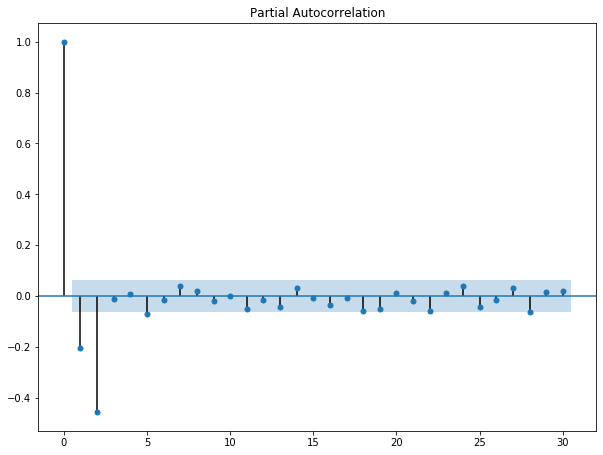

In [64]:
plot_pacf(AR2_process);

What do you notice?

- A significant peak is seen until lag 2 which gives an impression that the oder of this process is indeed 2.  


### Model Simulation to get back our coefficients

In [69]:
#use yule_walker function

rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.29289981 0.4545596 ]
sigma: 1.0059788246372419


### Make Predictions using AR model

In [70]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.77702739]


## Actvity: 


In a Jupyter Notebook, simulate the following equations:
    
1. Use MA to simulate this equation: $ y_t = 0.5Z_{t-1} + 0.4Z_{t-2} $
2. Use AR to simulate this equation: $ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3} $